# Gradient Descent - 2D Example
This demo will work through a very basic example of how to think about and compute loss landscapes and gradients. Each unique combination of parameter values is associated with an error and loss. The loss is a metric of how well our model's predictions match the actual outcomes in our training data. Depending on the type of model and algorithmic objective, or loss function is defined differently. In linear regression, it is computed from the error between predictions and actual outcomes, either for a single trainingdata point, across a subset of datapoints in our training data, or across all datapoints to our disposal. In linear regression, the error is simple the difference between prediction yi and actual outcome yi. Defined in this way, error can be both positive and negative. Loss is then defined as the sum of squared errors, divided by the number of data points used. The helper functions below implement these metrics. 

### Import

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import multivariate_normal as mnorm
from scipy import ndimage
from matplotlib import cm
from mpl_toolkits import mplot3d

### Fonts

In [2]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Compute Error

In [3]:
def compute_error(y_pred,y):
    
    error = y_pred - y
    return error

### Compute Loss

In [4]:
def compute_loss(y_pred,y):
    
    error = compute_error(y_pred,y)
    loss = np.sum(error**2) / len(y_pred)
    return loss

### Predict

In [5]:
def predict(X,theta):
    
    ypred = np.cos(theta[0]*2*X[:,0]) + np.sin(theta[1]*3*X[:,1])# + np.cos((theta[1]+theta[0])*2.22*(X[:,0]))
    return ypred

### Create Data
Our data is generated using a complex model

In [6]:
xval = np.linspace(-2.5, 2.5, 101)
yval = np.linspace(-2.5, 2.5, 101)
[xm,ym] = np.meshgrid(xval, yval)
xmf = xm.flatten()
ymf = ym.flatten()
theta = [0.25,0.25];
X = np.vstack((xmf,ymf)).T
y = predict(X,theta)

### Compute the loss for a range of values for a and b
Since we created our data with a = 0, b = 0, the loss is minimal for this value. 

(21, 21, 4)
(21, 21)


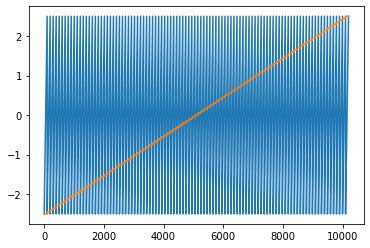

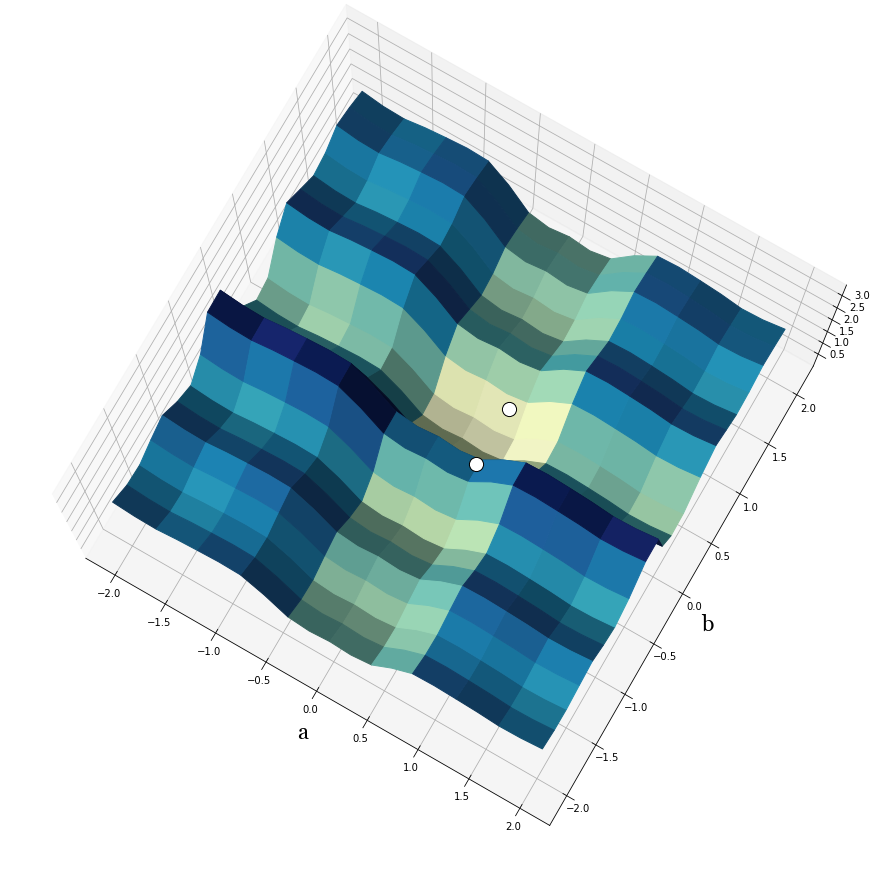

In [9]:
errors = []
losses = []
dim = 21
aval = np.linspace(-2,2, dim)
bval = np.linspace(-2,2, dim)
[am,bm] = np.meshgrid(aval, bval)
amf = am.flatten()
bmf = bm.flatten()

loss_landscape = np.zeros((dim,dim))
for i in range(am.shape[0]):
    for j in range(bm.shape[0]):
        y_pred = predict(X,[am[i,j],bm[i,j]])
        error = compute_error(y_pred,y)
        loss_landscape[i,j] = compute_loss(y_pred,y)

#Sobel
sx = ndimage.sobel(loss_landscape,axis=0,mode='constant')
sy = ndimage.sobel(loss_landscape,axis=1,mode='constant')
sobel=np.hypot(sx,sy)
sobel[:,0] = sobel[:,1]
sobel[:,-1] = sobel[:,-2]
sobel[0,:] = sobel[1,:]
sobel[-1,:] = sobel[-2,:]

#Colors
gn = sobel - np.min(sobel)
gn = gn / np.max(gn)
gradient_colors = cm.YlGnBu(gn)
zn = loss_landscape - np.min(loss_landscape)
zn = zn / np.max(zn)
loss_colors = cm.YlGnBu(zn)
print(loss_colors.shape)
print(am.shape)


a = 0.25
b = 0.00
y_pred = predict(X,[a,b])
error = compute_error(y_pred,y)
plt.plot(X)
loss = compute_loss(y_pred,y)
delta = np.dot(X.T,error) / (0.5*X.shape[0])

#Plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d',computed_zorder=False )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
ax.plot_surface(am, bm, loss_landscape, alpha=1.0, rstride=1, cstride=2, antialiased = True, facecolors = loss_colors)
ax.set_xlabel('\na',fontsize=22,**csfont);
ax.set_ylabel('\nb',fontsize=22,**csfont);
xlm = ax.get_xlim3d()
ylm = ax.get_ylim3d()
zlm = ax.get_zlim3d()
ax.set_xlim3d(xlm[0] * 1.0, xlm[1] * 1.0)
ax.set_ylim3d(ylm[0] * 1.0, ylm[1] * 1.0)
ax.set_zlim3d(zlm[0] * 1.0, zlm[1] * 1.0)
azm = ax.azim
elevation = ax.elev + 50
ax.view_init(elev=elevation, azim=azm)        

ax.scatter(a, b, loss,s=200,alpha=1.0,color='w',edgecolors='k')
ax.scatter(a-(delta[0]*0.25), b-(delta[1]*0.25), loss,s=200,alpha=1.0,color='w',edgecolors='k')

# print(delta)


# plt.savefig('../../assets/matplotlib/014_gradient_2d_1.png',dpi=300,bbox_inches="tight")

### Plot Sequence

1.0 1.2323218965777984
1.0 1.4646437931555971
1.0 1.6969656897333958
1.0 1.9292875863111945
1.0 2.161609482888993
1.0 2.393931379466792
1.0 2.62625327604459
1.0 2.8585751726223885
1.0 3.0908970692001874
1.0 3.323218965777986
1.0 3.5555408623557843
1.0 3.7878627589335827
1.0 4.020184655511382
1.0 4.25250655208918
1.0 4.4848284486669785
1.0 4.717150345244777
1.0 4.949472241822575
1.0 5.181794138400374
1.0 5.414116034978172
1.0 5.646437931555971
1.0 5.878759828133769
1.0 6.1110817247115685
1.0 6.343403621289367
1.0 6.575725517867165
0.9999999999999999 6.808047414444964
0.9999999999999999 7.040369311022762
1.0 7.272691207600561
1.0 7.505013104178359
1.0 7.737335000756158
1.0 7.969656897333956
1.0 8.201978793911755
1.0 8.434300690489554
1.0 8.666622587067351
1.0 8.89894448364515
1.0 9.13126638022295
1.0 9.36358827680075
1.0 9.595910173378547
1.0 9.828232069956345
1.0 10.060553966534144
1.0 10.292875863111943
1.0 10.525197759689743
1.0 10.75751965626754
1.0 10.989841552845338
1.0 11.22216344

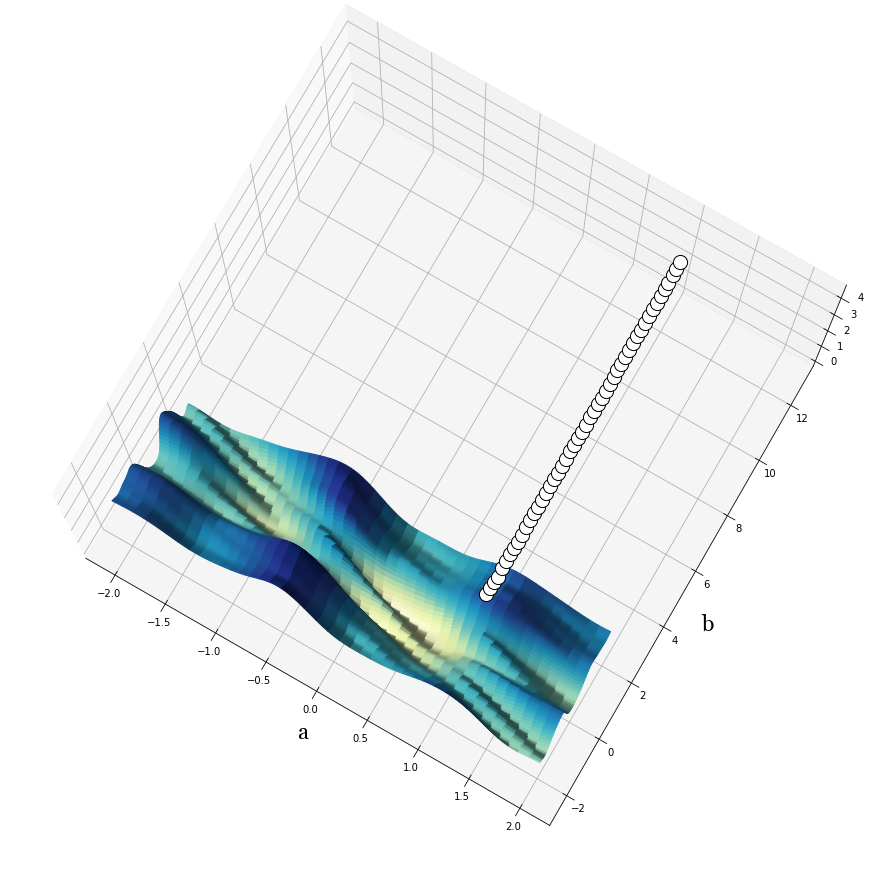

In [16]:
a = +1.0
b = +1.0
learning_rate = 0.1
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d',computed_zorder=False )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
ax.plot_surface(am, bm, loss_landscape, alpha=1.0, rstride=1, cstride=2, antialiased = True, facecolors = loss_colors)
ax.set_xlabel('\na',fontsize=22,**csfont);
ax.set_ylabel('\nb',fontsize=22,**csfont);

for i in range(50):
    y_pred = predict(X,[a,b])
    error = compute_error(y_pred,y)
    loss = compute_loss(y_pred,y)
    delta = np.dot(X.T,error) / (0.5*X.shape[0])
    
    ax.scatter(a, b, loss,s=200,alpha=1.0,color='w',edgecolors='k')

    #Update a
    a = a - delta[0]*learning_rate
    b = b - delta[1]*learning_rate
    print(a,b)
    

xlm = ax.get_xlim3d()
ylm = ax.get_ylim3d()
zlm = ax.get_zlim3d()
ax.set_xlim3d(xlm[0] * 1.0, xlm[1] * 1.0)
ax.set_ylim3d(ylm[0] * 1.0, ylm[1] * 1.0)
ax.set_zlim3d(zlm[0] * 1.0, zlm[1] * 1.0)
azm = ax.azim
elevation = ax.elev + 50
ax.view_init(elev=elevation, azim=azm)        
plt.savefig('../../assets/matplotlib/014_gradient_2d_2.png',dpi=300,bbox_inches="tight");  

### Animate the process with a small learning rate, simulating conventional gradient descent

In [17]:
a = -2.0
b = +1.0
learning_rate = 0.001
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d',computed_zorder=False )
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

for i in range(3):
    y_pred = predict(X,[a,b])
    error = compute_error(y_pred,y)
    loss = compute_loss(y_pred,y)
    delta = np.dot(X.T,error) / (0.5*X.shape[0])
    
    ax.plot_surface(am, bm, loss_landscape, alpha=1.0, rstride=1, cstride=2, antialiased = True, facecolors = loss_colors)
    ax.set_xlabel('\na',fontsize=22,**csfont);
    ax.set_ylabel('\nb',fontsize=22,**csfont);
    xlm = ax.get_xlim3d()
    ylm = ax.get_ylim3d()
    zlm = ax.get_zlim3d()
    ax.set_xlim3d(xlm[0] * 1.0, xlm[1] * 1.0)
    ax.set_ylim3d(ylm[0] * 1.0, ylm[1] * 1.0)
    ax.set_zlim3d(zlm[0] * 1.0, zlm[1] * 1.0)
    azm = ax.azim
    elevation = ax.elev + 50
    ax.view_init(elev=elevation, azim=azm)        

    ax.scatter(a, b, loss,s=200,alpha=1.0,color='w',edgecolors='k')
    plt.savefig('../../assets/matplotlib/014_gradient_2d_anim_' + str(i) + '.png',dpi=300,bbox_inches="tight");
    plt.clf()    

    #Update a
    a = a - delta[0]*learning_rate
    b = b - delta[1]*learning_rate
    print(a,b)

-2.0 1.0021651265753566
-2.0 1.0043302531507132
-2.0 1.0064953797260698


<Figure size 864x864 with 0 Axes>